# 📧 Email Spam Classification using Machine Learning

# Task: Build a binary classification model to classify emails as Spam or Ham (Not Spam).


In [54]:
# 📦 Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import joblib

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 📥 Loading Dataset

In [56]:

df = pd.read_csv("spam.csv", encoding='latin-1')


# Automatically select first two columns as label and text
df = df.iloc[:, :2]
df.columns = ['label', 'text']

# Check
df.head()



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 🔍 EDA 

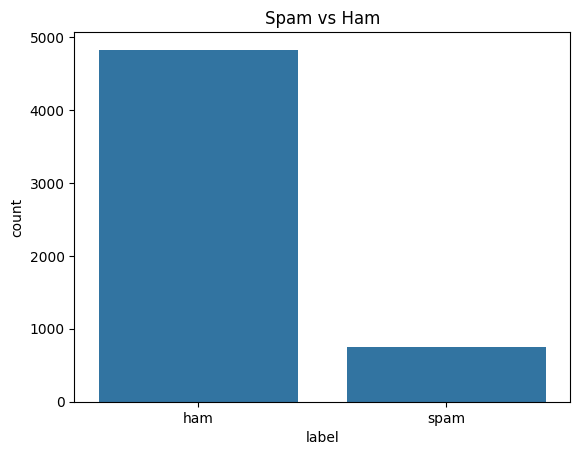

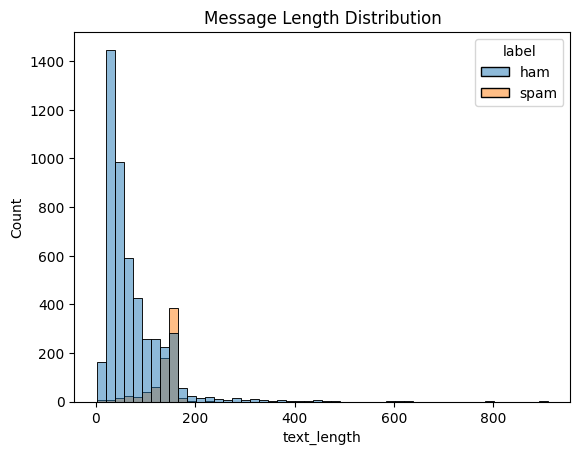

In [57]:

sns.countplot(x='label', data=df)
plt.title("Spam vs Ham")
plt.show()

df['text_length'] = df['text'].apply(len)
sns.histplot(data=df, x='text_length', hue='label', bins=50)
plt.title("Message Length Distribution")
plt.show()


# ☁️ WordClouds

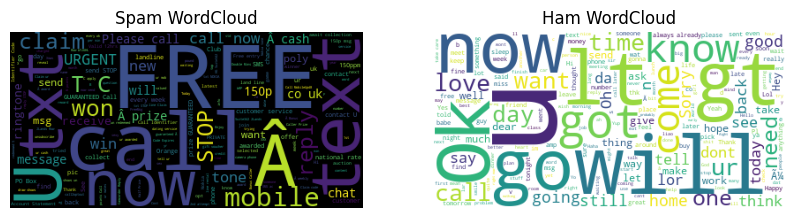

In [58]:

spam_words = ' '.join(df[df['label'] == 'spam']['text'])
ham_words = ' '.join(df[df['label'] == 'ham']['text'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color='black').generate(spam_words))
plt.axis('off')
plt.title('Spam WordCloud')

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color='white').generate(ham_words))
plt.axis('off')
plt.title('Ham WordCloud')
plt.show()


# 🧹 Text Cleaning

In [59]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove numbers
    return text

df['clean_text'] = df['text'].apply(clean_text)


# 🔡 Vectorization

In [60]:

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['clean_text'])

y = df['label'].map({'ham': 0, 'spam': 1})


# 🧠 Model Training of naive bayes

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)






MultinomialNB()

# Predicting naive bayes

In [62]:

nb_pred = nb.predict(X_test)

# Model training of Logistic Regression 

In [63]:

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

# Predicting logistic regression

In [64]:

lr_pred = lr.predict(X_test)

# Model training of SVM

In [65]:

svm = SVC()
svm.fit(X_train, y_train)



SVC()

# Predicting SVM 

In [66]:
svm_pred = svm.predict(X_test)

# 📊 Evaluation Function

In [67]:

def evaluate(name, y_true, y_pred):
    print(f"\n{name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()





# Evaluation of Naive bayes


Naive Bayes Accuracy: 0.9641
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



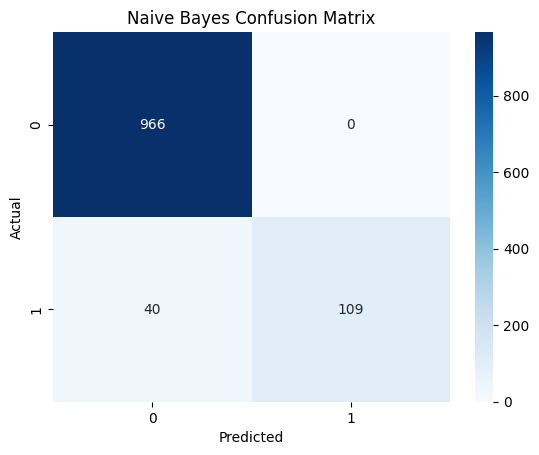

In [68]:

evaluate("Naive Bayes", y_test, nb_pred)

# Evaluation of logistic regression


Logistic Regression Accuracy: 0.9570
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



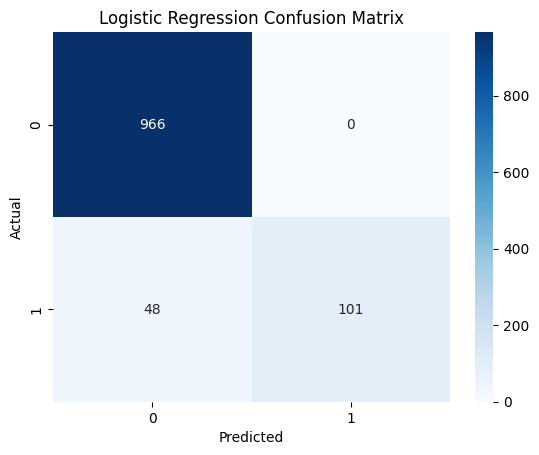

In [69]:

evaluate("Logistic Regression", y_test, lr_pred)


# Evaluation of SVM


SVM Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



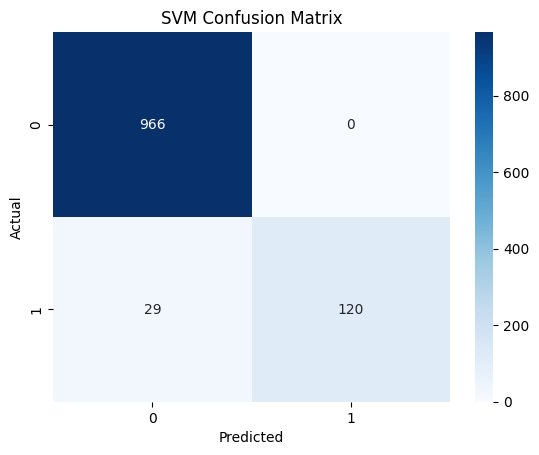

In [70]:

evaluate("SVM", y_test, svm_pred)

In [71]:
# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

# Save trained models

In [72]:

joblib.dump(nb, "naive_bayes_model.pkl")

['naive_bayes_model.pkl']

In [73]:
joblib.dump(lr, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [74]:
joblib.dump(svm, "svm_model.pkl")

['svm_model.pkl']

# 🔎 Predict on Custom Messages using naive bayes

In [75]:

def predict_message(model, vectorizer, messages):
    clean = [clean_text(msg) for msg in messages]
    vec = vectorizer.transform(clean)
    pred = model.predict(vec)
    for msg, label in zip(messages, pred):
        print(f">>> '{msg}' --> {'Spam' if label else 'Ham'}")

sample_msgs = [
    "Win a free iPhone now!",
    "Hi, just checking on our meeting tomorrow.",
    "You’ve been selected for a cash prize!",
    "See you at 3pm in class."
]

predict_message(nb, tfidf, sample_msgs)


>>> 'Win a free iPhone now!' --> Spam
>>> 'Hi, just checking on our meeting tomorrow.' --> Ham
>>> 'You’ve been selected for a cash prize!' --> Spam
>>> 'See you at 3pm in class.' --> Ham


# Predict on full dataset using best model (Naive Bayes)

In [76]:

df['predicted_label'] = nb.predict(X)

# Map back to 'Spam' or 'Ham'
df['predicted_label'] = df['predicted_label'].map({1: 'Spam', 0: 'Ham'})

# Preview result
df[['text', 'label', 'predicted_label']].head(10)


,text,label,predicted_label
0,"Go until jurong point, crazy.. Available only ...",ham,Ham
1,Ok lar... Joking wif u oni...,ham,Ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Spam
3,U dun say so early hor... U c already then say...,ham,Ham
4,"Nah I don't think he goes to usf, he lives aro...",ham,Ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam,Ham
6,Even my brother is not like to speak with me. ...,ham,Ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham,Ham
8,WINNER!! As a valued network customer you have...,spam,Spam
9,Had your mobile 11 months or more? U R entitle...,spam,Spam


In [77]:
# Save the full dataset with predictions
df.to_csv("spam_predictions.csv", index=False)
